# MACHINE LEARNING 1: ASSIGNMENT 4

### NAME:AARAN D'LIMA 

### REG.NO.:21BDA23

1)Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

### Some concepts to know before answering:
1) Training Error:
If we apply the model to the data it was trained on, we are calculating the training error

2) Testing error
If we calculate the error on data which was unknown in the training phase, we are calculating the test error

3) Polynomial Kernel
Commonly used with SVM.It represents the similarity of  training samples in a feature space over polynomials of the original variables, allowing learning of non-linear models.

4) Linear Kernel
Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is one of the most common kernels to be used.

In [44]:
#Importing the packages that is needed for this problem
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt

In [45]:
#Generating two class dataset with 100 observations ans two featurs
#We will use numpy for the same
np.random.seed(0)
X = np.random.normal(0, 2, 100)
Y = X**2 + 3*X + np.random.normal(0, 1, 100)

In [46]:
c = list(range(0, 100))
c1 = np.random.randint(0, 100, size=50, dtype='l')
c2 = [x for x in c if x not in c1]
Y[c1] = Y[c1] + 5
Y[c2] = Y[c2] - 5

In [47]:
labels = np.asarray([1]*100)
labels[c2] = labels[c2] -2

In [48]:
M = np.column_stack((X,Y))

In [49]:
#Split to training and test set:
X_train, X_test, y_train, y_test = train_test_split(M, labels, test_size=0.1)

### Linear Kernel

In [50]:
# fit the linear model i.e here we are going for SVC
clf = svm.SVC(kernel='linear', C=10000)
clf.fit(X_train, y_train)

SVC(C=10000, kernel='linear')

In [51]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

In [52]:
# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


Text(0.5, 1.0, 'Linear Kernel')

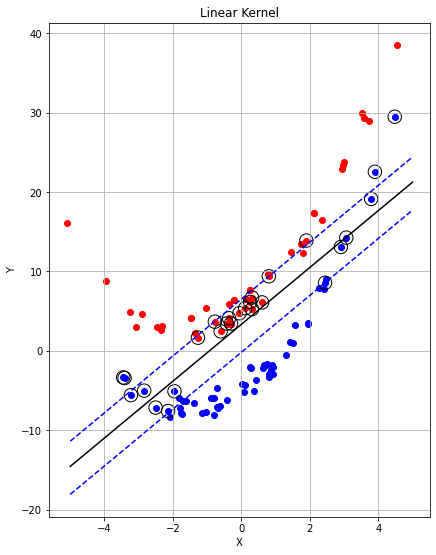

In [66]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(221)

plt.scatter(X[c2], Y[c2], color='b')
plt.scatter(X[c1], Y[c1], color='red')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--', color='b')
plt.plot(xx, yy_up, 'k--', color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()
ax.set_title("Linear Kernel")

In [60]:
print("Training error for linear kernel: "
      + str((len(X_train) - sum(y_train == clf.predict(X_train)))*100/len(X_train)))
print("Testing error for linear kernel: "
      + str((len(X_test) - sum(y_test == clf.predict(X_test)))*100/len(X_test)))


Training miss classification for linear kernel: 7.777777777777778
Test miss classification for linear kernel: 0.0


Here we can see that training and testing error is almost less we can say that the modelis a good fit.

### Polynomial Kernel - Degree 2

In [54]:
#fit polynomial model
clf_poly = svm.SVC(kernel='poly', degree=2, C=1000)
clf_poly.fit(X_train, y_train)

x_min = -6
x_max = 6
y_min = -20
y_max = 50

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf_poly.decision_function(np.c_[XX.ravel(), YY.ravel()])

Text(0.5, 1.0, 'Polynomial Kernel (Degree: 2)')

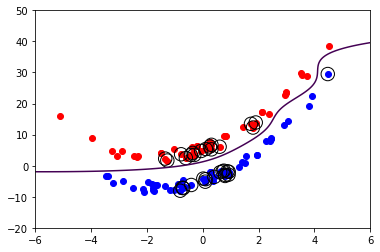

In [67]:
# Put the result into a color plot
Z = Z.reshape(XX.shape)
ax = fig.add_subplot(222)

plt.scatter(X[c2], Y[c2], color='b')
plt.scatter(X[c1], Y[c1], color='r')
plt.scatter(clf_poly.support_vectors_[:, 0], clf_poly.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')

plt.contour(XX, YY, Z, levels=[0])
ax.grid()
ax.set_title("Polynomial Kernel (Degree: 2)")

In [61]:
print("Training error for polynomial kernel (degree 2): "
      + str((len(X_train) - sum(y_train == clf_poly.predict(X_train)))*100/len(X_train)))
print("Test error for polynomial kernel (degree 2): "
      + str((len(X_test) - sum(y_test == clf_poly.predict(X_test)))*100/len(X_test)))


Training miss classification for polynomial kernel (degree 2): 15.555555555555555
Test miss classification for polynomial kernel (degree 2): 20.0


Here we can see that training error is lower than testing error to some extent we can say that there is a problem with Variance

### Polynomial Kernel-Degree 3

In [73]:
#fit polynomial model: degree 3
clf_poly_3 = svm.SVC(kernel='poly', degree=3, C=1000)
clf_poly_3.fit(X_train, y_train)

x_min = -6
x_max = 6
y_min = -20
y_max = 50

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf_poly_3.decision_function(np.c_[XX.ravel(), YY.ravel()])
p_poly = clf_poly.predict(M)

Text(0.5, 1.0, 'Polynomial Kernel (Degree: 3)')

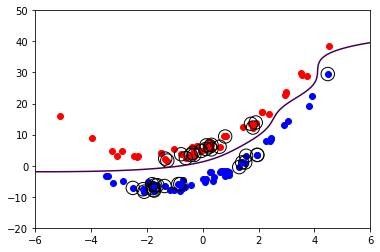

In [68]:
# Put the result into a color plot
Z = Z.reshape(XX.shape)
ax = fig.add_subplot(223)

plt.scatter(X[c2], Y[c2], color='b')
plt.scatter(X[c1], Y[c1], color='r')
plt.scatter(clf_poly_3.support_vectors_[:, 0], clf_poly_3.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')

plt.contour(XX, YY, Z, levels=[0])
ax.grid()
ax.set_title("Polynomial Kernel (Degree: 3)")

In [62]:
print("Training error for polynomial kernel (degree 3): "
      + str((len(X_train) - sum(y_train == clf_poly_3.predict(X_train)))*100/len(X_train)))
print("Test error for polynomial kernel (degree 3): "
      + str((len(X_test) - sum(y_test == clf_poly_3.predict(X_test)))*100/len(X_test)))


Training miss classification for polynomial kernel (degree 3): 10.0
Test miss classification for polynomial kernel (degree 3): 0.0


Here we can see that training and testing error is almost less we can say that the modelis a good fit.

### Radial Kernel

In [58]:
#fit radial kernel
clf_radial = svm.SVC(kernel='rbf', C=1000)
clf_radial.fit(X_train, y_train)

Z = clf_radial.decision_function(np.c_[XX.ravel(), YY.ravel()])


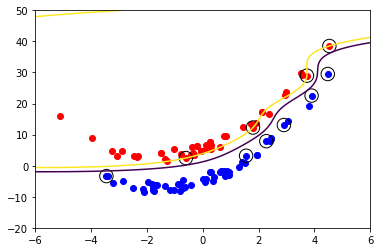

In [69]:
# Put the result into a color plot
Z = Z.reshape(XX.shape)
ax = fig.add_subplot(224)

plt.scatter(X[c2], Y[c2], color='b')
plt.scatter(X[c1], Y[c1], color='r')
plt.scatter(clf_radial.support_vectors_[:, 0], clf_radial.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')


plt.contour(XX, YY, Z, levels=[0, 1])
ax.grid()
ax.set_title("Radial Kernel")

plt.show()


In [63]:
print("Training error for radial kernel: "
      + str((len(X_train) - sum(y_train == clf_radial.predict(X_train)))*100/len(X_train)))
print("Testing error for radial kernel: "
      + str((len(X_test) - sum(y_test == clf_radial.predict(X_test)))*100/len(X_test)))

Training miss classification for radial kernel: 0.0
Test miss classification for radial kernel: 0.0


In [ ]:
We can consider that radial kernel gives a good fit

# Question 2

2) Answer the following questions


a)Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them.

In [96]:
import matplotlib

np.random.seed(0)
X1 = np.random.uniform(0, 1, 500) - 0.5
X2 = np.random.uniform(0, 1, 500) - 0.5
Y = ((X1**2 - X2**2) > 0).astype(int)
color= ['yellow' if l == 0 else 'blue' for l in Y]



b)Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the yaxis.

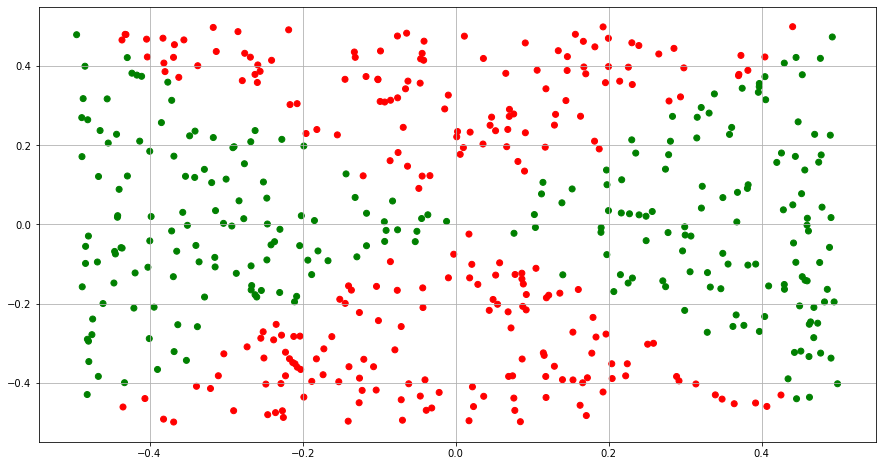

In [97]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.grid()
plt.show()

c)Fit a logistic regression model to the data, using X1 and X2 as predictors.

d)Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

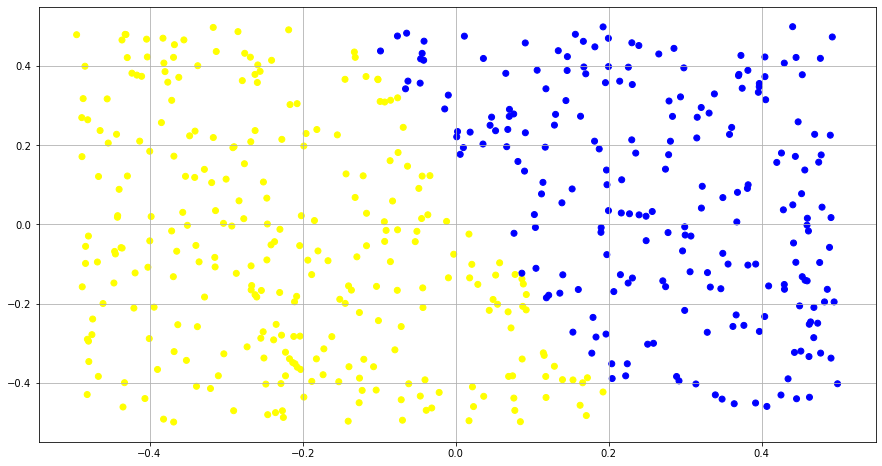

In [98]:
from sklearn.linear_model import LogisticRegression

X = np.column_stack((X1,X2))
clf = LogisticRegression(random_state=0, fit_intercept=True)
clf.fit(X, Y)
Y_train = clf.predict(X)

color= ['yellow' if l == 0 else 'blue' for l in Y_train]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.grid()
plt.show()

e)Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors.

f)Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

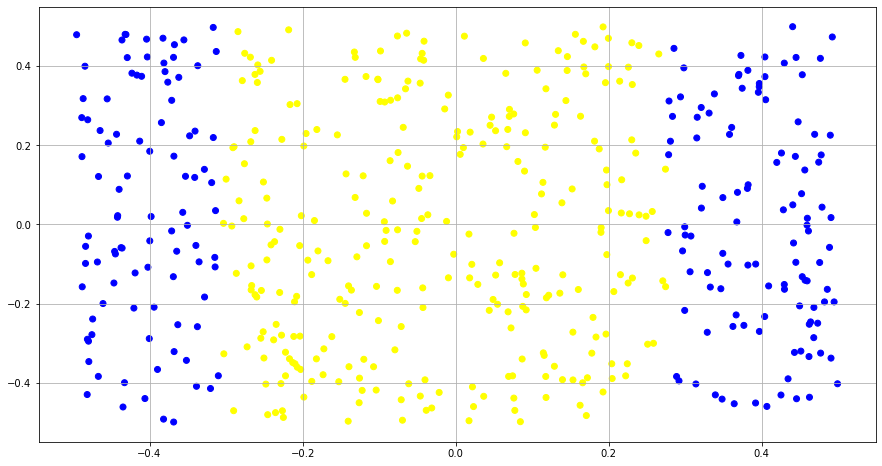

In [99]:
X1_2 = X1**2
X2_2 = X1**2

X = np.column_stack((X1,X2,X1_2,X2_2))
clf = LogisticRegression(random_state=0, fit_intercept=True)
clf.fit(X, Y)
Y_train = clf.predict(X)

color= ['yellow' if l == 0 else 'blue' for l in Y_train]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.grid()
plt.show()

g)Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

In [100]:
X = np.column_stack((X1,X2))
# fit the linear model
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, Y)
Y_train = clf.predict(X)
color= ['yellow' if l == 0 else 'blue' for l in Y_train]


In [101]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-0.5, 0.5)
yy = a * xx - (clf.intercept_[0]) / w[1]

In [102]:
# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


Text(0.5, 1.0, 'Linear Kernel')

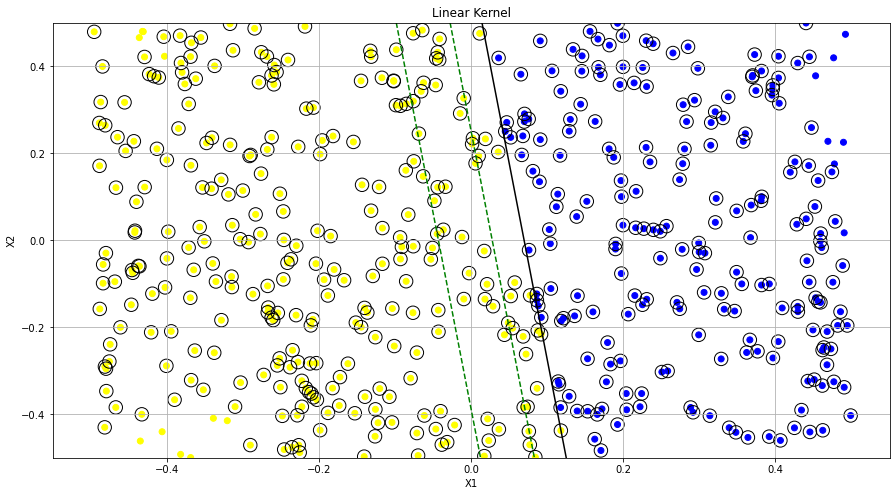

In [103]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--', color='g')
plt.plot(xx, yy_up, 'k--', color='g')

ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.grid()
ax.set_title("Linear Kernel")

h)Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

Text(0.5, 1.0, 'Polynomial Kernel (Degree: 2)')

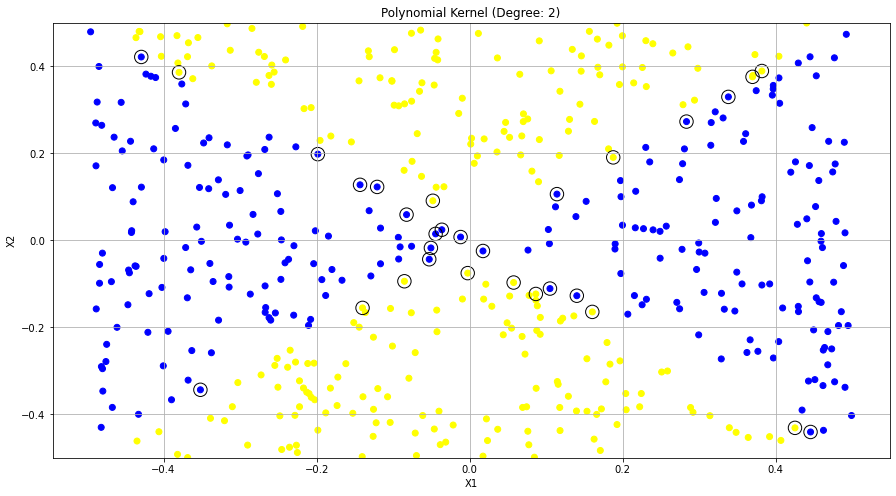

In [104]:
X = np.column_stack((X1,X2))
# fit the linear model
clf = svm.SVC(kernel='poly', degree=2, C=100)
clf.fit(X, Y)
Y_train = clf.predict(X)
color= ['yellow' if l == 0 else 'blue' for l in Y_train]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')

ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.grid()
ax.set_title("Polynomial Kernel (Degree: 2)")